<a href="https://colab.research.google.com/github/quintola/Analise_dados_pos_graducao/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ATIVIDADE PRATICA 7

###CLUSTERIZAÇÃO
PROFESSOR: HUGO DE PAULA

ALUNOS: DIEGO SOUZA E MARCOS JUNQUEIRA

## CARREGAMENTO PACOTES NECESSÁRIOS PARA ATIVIDADE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from time import time
from sklearn.pipeline import make_pipeline
import math



##CARREGAMENTO BASE QUE SERÁ TRABALHADA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Atividade 6 - Saude.xlsx to Atividade 6 - Saude.xlsx


## EXPLORAÇÃO DA BASE


In [ ]:
Saude = pd.read_excel('Atividade 6 - Saude.xlsx', sheet_name=0)
print("\nDimensões:\n{0}\n".format(Saude.shape))
print("\nCampos:\n{0}\n".format(list(Saude.keys())))
print("\nTipos dos dados:\n")
format(Saude.info())
print(Saude.describe().to_string(max_cols=Saude.shape[1]), sep='\n')


Dimensões:
(547, 3)


Campos:
['Peso', 'Colesterol', 'Genero']


Tipos dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB
             Peso  Colesterol      Genero
count  547.000000  547.000000  547.000000
mean   143.572212  170.433272    0.513711
std     30.837275   39.147189    0.500269
min     95.000000  102.000000    0.000000
25%    116.000000  136.000000    0.000000
50%    140.000000  169.000000    1.000000
75%    171.000000  208.000000    1.000000
max    203.000000  235.000000    1.000000


In [ ]:
X_tranf = StandardScaler().fit_transform(Saude)
n_samples = X.shape[0]
X_Array = np.array(Saude)

X = X_Array

estimator = KMeans(n_clusters=2, random_state=0)

modelo = estimator.fit(X)

y_pred = estimator.predict(X)
modelo


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

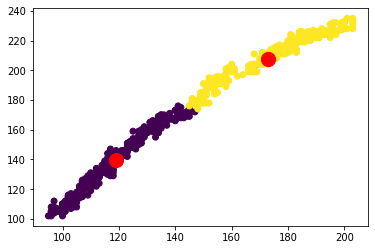

__________________________________________________________________________________
init		time	inertia	variance	silhouette
2 Clusters	0.00s	330659	1690.14		0.631
__________________________________________________________________________________
Centroids [[119.0738255  139.34899329   0.47986577]
 [172.89156627 207.63453815   0.55421687]]


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')

plt.show()

labels = estimator.labels_

print(82 * '_')
print('init\t\ttime\tinertia\tvariance\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.2f\t\t%.3f'
      % ('2 Clusters', 0, estimator.inertia_,
              metrics.calinski_harabasz_score(X, labels),
              metrics.silhouette_score(X, labels,
                                       metric='euclidean',
                                       sample_size=n_samples)))
print(82 * '_')
print("Centroids", estimator.cluster_centers_)

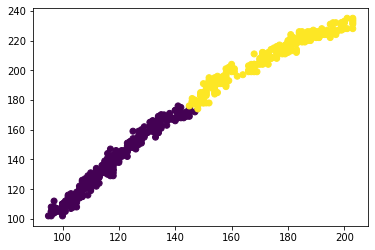

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	330659	1.000	1.000	1.000	1.000	1.000	0.631
__________________________________________________________________________________
Centroids [[119.0738255  139.34899329   0.47986577]
 [172.89156627 207.63453815   0.55421687]]


In [ ]:
# kmaens ++
estimator = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_pred = estimator.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_),
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))
print(82 * '_')
print("Centroids", estimator.cluster_centers_)

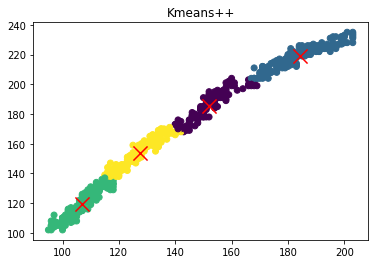

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	81517	0.846	0.422	0.563	0.439	0.562	0.571
__________________________________________________________________________________
Centroids [[151.89166667 185.63333333   0.43333333]
 [184.31818182 218.91558442   0.59090909]
 [106.79136691 119.4028777    0.54676259]
 [127.44776119 154.03731343   0.46268657]]


In [ ]:
# kmaens ++
estimator = KMeans(n_clusters=4, random_state=0, init='k-means++')
y_pred = estimator.fit_predict(X)

centroids = estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=120, c='red', label = 'Centroids')
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=200, linewidths=3,
        color='red', zorder=10)
plt.title("Kmeans++")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_),
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))
print(82 * '_')
print("Centroids", estimator.cluster_centers_)

In [ ]:
kmeans = KMeans (n_clusters= 2).fit(Saude)
centroids = kmeans.cluster_centers_

print(centroids)

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", n_clusters = 4, data=X, labels=y_pred)

kmeans = KMeans(init="random", n_clusters=2, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=y_pred)

pca = PCA(n_components=2).fit(X)
kmeans = KMeans(init=pca.components_, n_clusters=2, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=X, labels=y_pred)

print("\n")

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=120, c='red', label = 'Centroids')
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='r', zorder=10)
plt.title("Kmeans++")
plt.show()


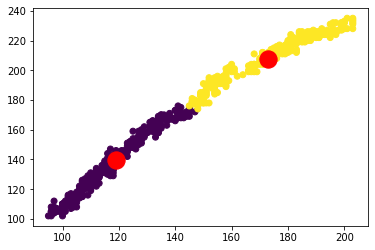

__________________________________________________________________________________
init		time	inertia	variance	silhouette
2 clusters	0.00s	330659	1690.14		0.631


Centroids [[119.0738255  139.34899329   0.47986577]
 [172.89156627 207.63453815   0.55421687]]


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.show()
labels = estimator.labels_
print(82 * '_')


kmeans = KMeans(init="k-means++", n_clusters=3, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=Saude, labels=y)

kmeans = KMeans(init="random", n_clusters=3, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=Saude, labels=y)

pca = PCA(n_components=3).fit(Saude)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=Saude, labels=y)


print('init\t\ttime\tinertia\tvariance\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.2f\t\t%.3f'
      % ('2 clusters', 0, estimator.inertia_,
              metrics.calinski_harabasz_score(X, labels),
              metrics.silhouette_score(X, labels,
                                       metric='euclidean',
                                       sample_size=n_samples)))



print("\n")
print("Centroids", estimator.cluster_centers_)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.show()
labels = estimator.labels_
print(82 * '_')


kmeans = KMeans(init="k-means++", n_clusters=3, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=Saude, labels=y)

kmeans = KMeans(init="random", n_clusters=3, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=Saude, labels=y)

pca = PCA(n_components=3).fit(Saude)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=Saude, labels=y)


print('init\t\ttime\tinertia\tvariance\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.2f\t\t%.3f'
      % ('2 clusters', 0, estimator.inertia_,
              metrics.calinski_harabasz_score(X, labels),
              metrics.silhouette_score(X, labels,
                                       metric='euclidean',
                                       sample_size=n_samples)))



print("\n")
print("Centroids", estimator.cluster_centers_)

In [ ]:
Saude['Peso'] = np.log10(Saude['Peso'])
Saude['Colesterol'] = np.log10(Saude['Colesterol'])

In [ ]:
X = MinMaxScaler().fit_transform(Saude)
X = Saude.iloc[:,0:(Saude.shape[1] - 1)]
le = LabelEncoder()
y = le.fit_transform(Saude.iloc[:,(Saude.shape[1] - 1)])
class_names = le.classes_

In [ ]:
def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(Saude)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

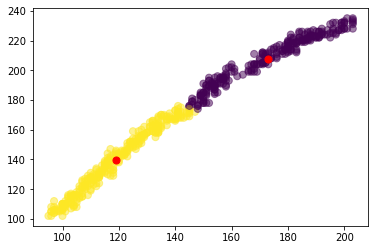

[[172.89156627 207.63453815   0.55421687]
 [119.0738255  139.34899329   0.47986577]]
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.018s	494	0.657	0.417	0.510	0.429	0.509	0.239
random   	0.013s	527	0.576	0.371	0.451	0.332	0.450	0.316
PCA-based	0.007s	494	0.657	0.417	0.510	0.429	0.509	0.258


In [ ]:
kmeans = KMeans (n_clusters= 2).fit(Saude)
centroids = kmeans.cluster_centers_

plt.scatter(Saude['Peso'], Saude["Colesterol"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

print(centroids)

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=Saude, labels=y)

kmeans = KMeans(init="random", n_clusters=3, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=Saude, labels=y)

pca = PCA(n_components=3).fit(Saude)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=Saude, labels=y)


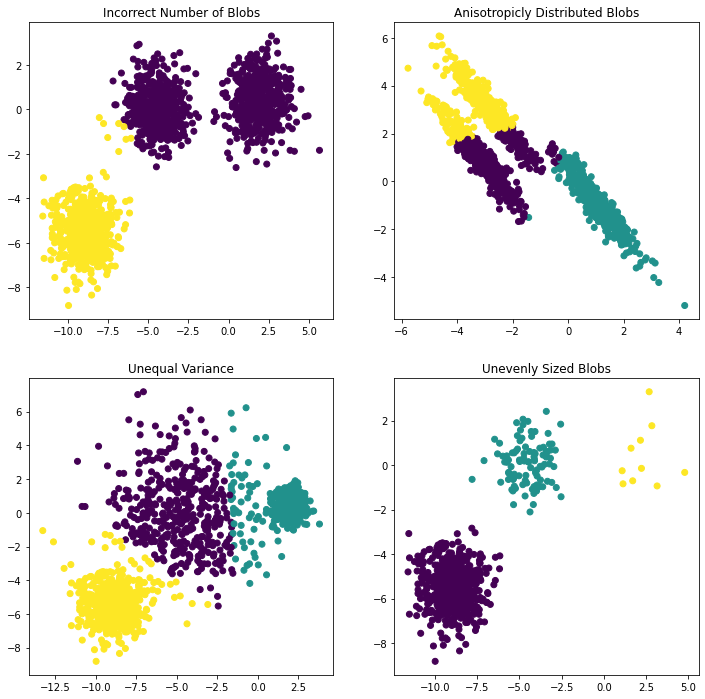

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()